These results are for HBM-stack DRAM cache (16 interface of 128-MB) backed-up by DDR4 memory (2 interface of 32-GB).

In [2]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir = '/scr/babaie/rebasedDCJuly/resAug29/1'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0


Stats = ['system.generator0.numPackets',
         'system.generator0.avgReadLatency',
         'system.generator0.avgWriteLatency',
         'system.generator0.readBW',
         'system.generator0.writeBW',
         'system.generator1.numPackets',
         'system.generator1.avgReadLatency',
         'system.generator1.avgWriteLatency',
         'system.generator1.readBW',
         'system.generator1.writeBW',
         'system.generator2.numPackets',
         'system.generator2.avgReadLatency',
         'system.generator2.avgWriteLatency',
         'system.generator2.readBW',
         'system.generator2.writeBW',
         'system.generator3.numPackets',
         'system.generator3.avgReadLatency',
         'system.generator3.avgWriteLatency',
         'system.generator3.readBW',
         'system.generator3.writeBW',
         'system.dcache_ctrl0.avgORBLen',
         'system.dcache_ctrl1.avgORBLen',
         'system.dcache_ctrl2.avgORBLen',
         'system.dcache_ctrl3.avgORBLen',
         'system.dcache_ctrl4.avgORBLen',
         'system.dcache_ctrl5.avgORBLen',
         'system.dcache_ctrl6.avgORBLen',
         'system.dcache_ctrl7.avgORBLen',
         'system.dcache_ctrl8.avgORBLen',
         'system.dcache_ctrl9.avgORBLen',
         'system.dcache_ctrl10.avgORBLen',
         'system.dcache_ctrl11.avgORBLen',
         'system.dcache_ctrl12.avgORBLen',
         'system.dcache_ctrl13.avgORBLen',
         'system.dcache_ctrl14.avgORBLen',
         'system.dcache_ctrl15.avgORBLen']




hit_miss = ['Hit', 'MissClean', 'MissDirty']
link_latency = ['0', '200', '400', '600', '800', '1600', '2000', '2600', '3000', '5000']
rd_perc = ['R100', 'R67']
inj_rate = ['02', '05', '1', '2', '4', '9', '14']

rows = []

for hm in hit_miss:
    for ll in link_latency:
        for ir in inj_rate:
            for rdPr in rd_perc:
                if ir=="02":
                    stats = [hm, "0.25", rdPr, ll]
                elif ir=="05":
                    stats = [hm, "0.5", rdPr, ll]
                else:
                    stats = [hm, ir, rdPr, ll]
                for stat in Stats:
                    time_file_path = '{}/{}_{}_{}_{}/stats.txt'.format(datadir, hm, ll, ir, rdPr)
                    ret_line = getStat(time_file_path,stat)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = -1
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df = pd.DataFrame(rows, columns=[
         'hm',
         'ir',
         'rdPr',
         'll',
         'numPackets0',
         'avgReadLatency0',
         'avgWriteLatency0',
         'readBW0',
         'writeBW0',
         'numPackets1',
         'avgReadLatency1',
         'avgWriteLatency1',
         'readBW1',
         'writeBW1',
         'numPackets2',
         'avgReadLatency2',
         'avgWriteLatency2',
         'readBW2',
         'writeBW2',
         'numPackets3',
         'avgReadLatency3',
         'avgWriteLatency3',
         'readBW3',
         'writeBW3',
         'avgORBLen0',
         'avgORBLen1',
         'avgORBLen2',
         'avgORBLen3',
         'avgORBLen4',
         'avgORBLen5',
         'avgORBLen6',
         'avgORBLen7',
         'avgORBLen8',
         'avgORBLen9',
         'avgORBLen10',
         'avgORBLen11',
         'avgORBLen12',
         'avgORBLen13',
         'avgORBLen14',
         'avgORBLen15'
         ])

df['linkLat'] = (df['ll']).astype(int)/2
df['totBW'] = (df['readBW0'].astype(float) + df['writeBW0'].astype(float)+
                df['readBW1'].astype(float) + df['writeBW1'].astype(float)+
                 df['readBW2'].astype(float) + df['writeBW2'].astype(float)+
                  df['readBW3'].astype(float) + df['writeBW3'].astype(float))/1000000000
# df['ARL'] = (df['avgReadLatency'].astype(float))/1000
# df['AWL'] = (df['avgWriteLatency'].astype(float))/1000
# df['ART'] = (df['ARL'].astype(float)*0.67 + df['AWL'].astype(float)*0.33)

df['avgORB'] = (df['avgORBLen0'].astype(float) + df['avgORBLen1'].astype(float)+
                df['avgORBLen2'].astype(float) + df['avgORBLen3'].astype(float)+
                 df['avgORBLen4'].astype(float) + df['avgORBLen5'].astype(float)+
                  df['avgORBLen6'].astype(float) + df['avgORBLen7'].astype(float)+
                  df['avgORBLen8'].astype(float) + df['avgORBLen9'].astype(float)+
                df['avgORBLen10'].astype(float) + df['avgORBLen11'].astype(float)+
                 df['avgORBLen12'].astype(float) + df['avgORBLen13'].astype(float)+
                  df['avgORBLen14'].astype(float) + df['avgORBLen15'].astype(float))/16

df.to_csv("/scr/babaie/rebasedDCJuly/resAug29/1/res_1.csv")

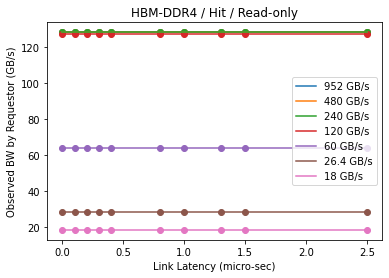

In [13]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["Hit"]) and (ir==["0.25"]) and (rdPr==["R100"])')[['totBW']]
y02 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["0.5"]) and (rdPr==["R100"])')[['totBW']]
y05 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["1"]) and (rdPr==["R100"])')[['totBW']]
y1 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["2"]) and (rdPr==["R100"])')[['totBW']]
y5 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["4"]) and (rdPr==["R100"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["9"]) and (rdPr==["R100"])')[['totBW']]
y3 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["14"]) and (rdPr==["R100"])')[['totBW']]
y4 = df_temp['totBW']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y02, label ="952 GB/s")
plt.scatter(latency, y02)
plt.plot(latency, y05, label ="480 GB/s")
plt.scatter(latency, y05)
plt.plot(latency, y1, label ="240 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y5, label ="120 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y2, label ="60 GB/s")
plt.scatter(latency, y2)
plt.plot(latency, y3, label ="26.4 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="18 GB/s")
plt.scatter(latency, y4)


plt.title("HBM-DDR4 / Hit / Read-only")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Aggregated BW (GiB/s)")
plt.legend()
plt.show()



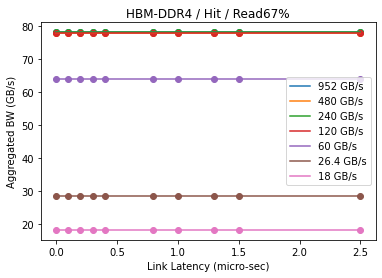

In [14]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["Hit"]) and (ir==["0.25"]) and (rdPr==["R67"])')[['totBW']]
y02 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["0.5"]) and (rdPr==["R67"])')[['totBW']]
y05 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["1"]) and (rdPr==["R67"])')[['totBW']]
y1 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["2"]) and (rdPr==["R67"])')[['totBW']]
y5 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["4"]) and (rdPr==["R67"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["9"]) and (rdPr==["R67"])')[['totBW']]
y3 = df_temp['totBW']
df_temp = df.query('(hm==["Hit"]) and (ir==["14"]) and (rdPr==["R67"])')[['totBW']]
y4 = df_temp['totBW']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y02, label ="952 GB/s")
plt.scatter(latency, y02)
plt.plot(latency, y05, label ="480 GB/s")
plt.scatter(latency, y05)
plt.plot(latency, y1, label ="240 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y5, label ="120 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y2, label ="60 GB/s")
plt.scatter(latency, y2)
plt.plot(latency, y3, label ="26.4 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="18 GB/s")
plt.scatter(latency, y4)

plt.title("HBM-DDR4 / Hit / Read67%")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Aggregated BW (GiB/s)")
plt.legend()
plt.show()

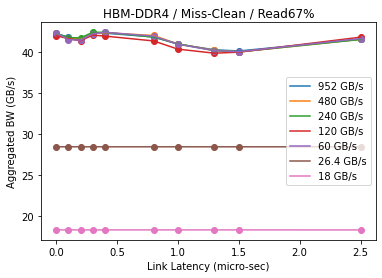

In [18]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["MissClean"]) and (ir==["0.25"]) and (rdPr==["R67"])')[['totBW']]
y02 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["0.5"]) and (rdPr==["R67"])')[['totBW']]
y05 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["1"]) and (rdPr==["R67"])')[['totBW']]
y1 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["2"]) and (rdPr==["R67"])')[['totBW']]
y5 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["4"]) and (rdPr==["R67"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["9"]) and (rdPr==["R67"])')[['totBW']]
y3 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["14"] and (rdPr==["R67"]))')[['totBW']]
y4 = df_temp['totBW']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y02, label ="952 GB/s")
plt.scatter(latency, y02)
plt.plot(latency, y05, label ="480 GB/s")
plt.scatter(latency, y05)
plt.plot(latency, y1, label ="240 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y2, label ="120 GB/s")
plt.scatter(latency, y2)
plt.plot(latency, y5, label ="60 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y3, label ="26.4 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="18 GB/s")
plt.scatter(latency, y4)

plt.title("HBM-DDR4 / Miss-Clean / Read67%")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Aggregated BW (GiB/s)")
plt.legend()
plt.show()

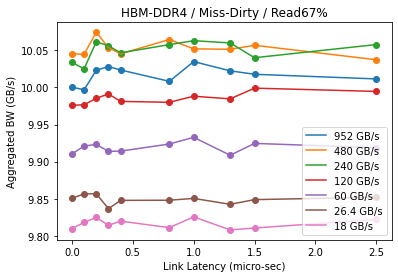

In [17]:
latency = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.3, 1.5, 2.5]
df_temp = df.query('(hm==["MissDirty"]) and (ir==["0.25"]) and (rdPr==["R67"])')[['totBW']]
y02 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["0.5"]) and (rdPr==["R67"])')[['totBW']]
y05 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["1"]) and (rdPr==["R67"])')[['totBW']]
y1 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["2"]) and (rdPr==["R67"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["4"]) and (rdPr==["R67"])')[['totBW']]
y5 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["9"]) and (rdPr==["R67"])')[['totBW']]
y3 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["14"]) and (rdPr==["R67"])')[['totBW']]
y4 = df_temp['totBW']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(latency, y02, label ="952 GB/s")
plt.scatter(latency, y02)
plt.plot(latency, y05, label ="480 GB/s")
plt.scatter(latency, y05)
plt.plot(latency, y1, label ="240 GB/s")
plt.scatter(latency, y1)
plt.plot(latency, y2, label ="120 GB/s")
plt.scatter(latency, y2)
plt.plot(latency, y5, label ="60 GB/s")
plt.scatter(latency, y5)
plt.plot(latency, y3, label ="26.4 GB/s")
plt.scatter(latency, y3)
plt.plot(latency, y4, label ="18 GB/s")
plt.scatter(latency, y4)

plt.title("HBM-DDR4 / Miss-Dirty / Read67%")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Aggregated BW (GiB/s)")
plt.legend()
plt.show()